# Practicel ML - KNN

### Full Name :
### Student Number :

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [27]:

from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/ML/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Inspect the first rows of the dataframe

In [28]:
# TODO
dataset = pd.read_csv(data_path+'train.csv')
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1,1585,...,1,80,0,15,5,3,1,0,0,0
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8


Calculate the number of samples

In [29]:
# TODO
print(f'number of samples is {dataset.shape[0]}')

number of samples is 1102


Measure the number of unique values for each column. Note that Attrition is the target column.

In [30]:
# TODO
dataset.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    736
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1102
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1027
MonthlyRate                 1082
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [31]:
# TODO
unique_values = dataset.nunique()

selected_cols = unique_values[unique_values < 2].index
print('removed cols are ', selected_cols)

dataset = dataset.drop(columns=selected_cols)

dataset.head()

removed cols are  Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1585,2,...,3,1,0,15,5,3,1,0,0,0
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1478,4,...,3,4,0,15,2,3,13,9,3,12
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1965,4,...,3,1,0,7,5,3,7,7,0,7
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,722,4,...,3,4,0,10,2,2,10,7,0,8


Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [32]:
# handle uniqueness

# TODO
print(np.unique(dataset['BusinessTravel']))

businessTravel_cols = pd.get_dummies(dataset['BusinessTravel'], prefix='BusinessTravel')
dataset_ = pd.concat([dataset, businessTravel_cols], axis=1)

dataset_.head()

['Non-Travel' 'Travel_Frequently' 'Travel_Rarely']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1883,4,...,11,2,3,3,2,1,2,False,False,True
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1585,2,...,15,5,3,1,0,0,0,False,False,True
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1478,4,...,15,2,3,13,9,3,12,False,False,True
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1965,4,...,7,5,3,7,7,0,7,False,False,True
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,722,4,...,10,2,2,10,7,0,8,False,False,True


In [33]:
# Map the column

# TODO
businessTravel_classes = {
    'Non-Travel': 0,
    'Travel_Rarely': 1,
    'Travel_Frequently': 2
}

dataset_['BusinessTravel_Class'] = dataset_['BusinessTravel'].map(businessTravel_classes)

meanAge = dataset_.groupby('BusinessTravel')['Age'].mean().reset_index()

dataset_[['BusinessTravel', 'BusinessTravel_Class']].head()

,BusinessTravel,BusinessTravel_Class
0,Travel_Rarely,1
1,Travel_Rarely,1
2,Travel_Rarely,1
3,Travel_Rarely,1
4,Travel_Rarely,1


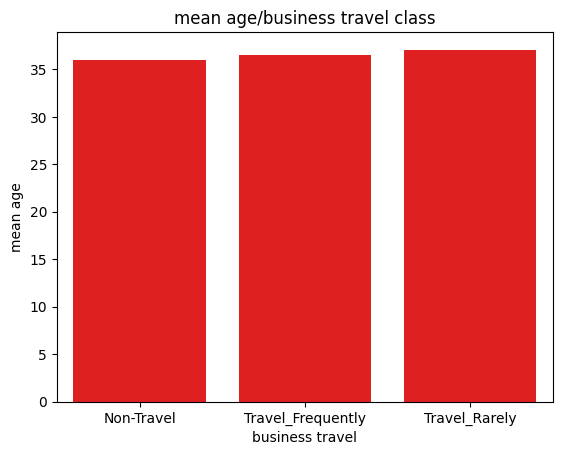

In [34]:
# plot

# TODO
sns.barplot(x='BusinessTravel', y='Age', color='red', data=meanAge)
plt.title('mean age/business travel class')
plt.xlabel('business travel')
plt.ylabel('mean age')
plt.show()

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

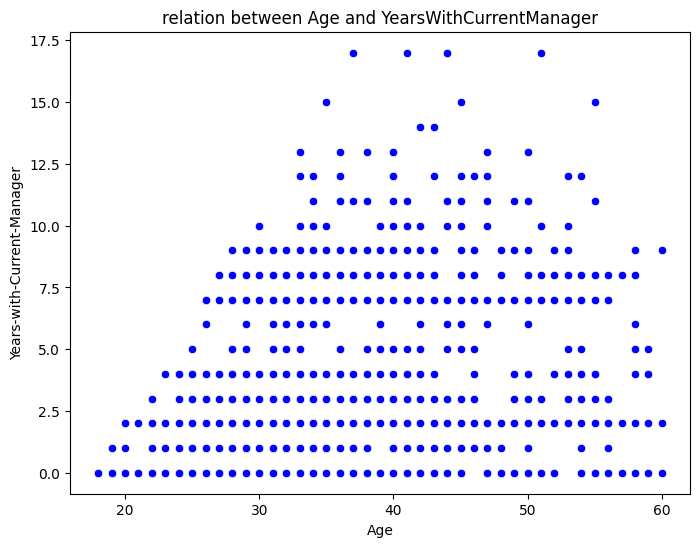

In [35]:
# TODO
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='YearsWithCurrManager', data=dataset_, color='b')
plt.title('relation between Age and YearsWithCurrentManager')
plt.xlabel('Age')
plt.ylabel('Years-with-Current-Manager')
plt.show()

Plot the average MonthlyIncome against the YearsAtCompany.

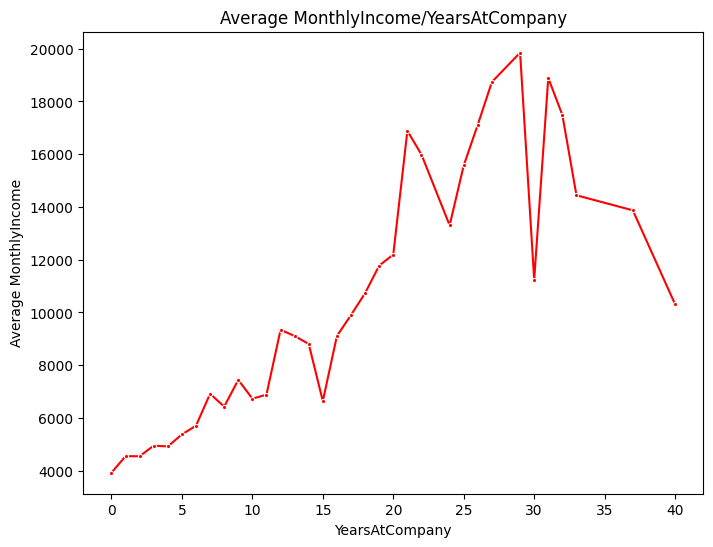

In [36]:
# TODO

plt.figure(figsize=(8, 6))
sns.lineplot(x='YearsAtCompany', y='MonthlyIncome', data=dataset_.groupby('YearsAtCompany')['MonthlyIncome'].mean().reset_index(), marker='.', color='r')
plt.title('Average MonthlyIncome/YearsAtCompany')
plt.xlabel('YearsAtCompany')
plt.ylabel('Average MonthlyIncome')
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [37]:
# Label encode

# TODO
qualitative_cols = dataset.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in qualitative_cols:
  dataset[col] = le.fit_transform(dataset[col])

In [38]:
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,0,2,592,1,7,3,1,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,36,0,2,884,2,1,4,1,1585,2,...,3,1,0,15,5,3,1,0,0,0
2,34,0,2,1326,2,3,3,4,1478,4,...,3,4,0,15,2,3,13,9,3,12
3,27,0,2,954,2,9,3,2,1965,4,...,3,1,0,7,5,3,7,7,0,7
4,32,0,2,929,2,10,3,2,722,4,...,3,4,0,10,2,2,10,7,0,8


In [39]:
# split into train and validation

# TODO
x = dataset.drop(columns=['Attrition'])
y = dataset['Attrition']

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=30)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=30)

In [40]:
# lens of train and validation datasets

# TODO
print(f'x_train shape: {x_train.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'x_test shape: {x_test.shape}')

x_train shape: (881, 31)
x_val shape: (111, 31)
x_test shape: (110, 31)


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [41]:
# TODO

# I did it in the above sectionss.

# x_train, x_val, x_test are the feature matrices
# y_train, y_val, y_test are the label matrices


# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [50]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # TODO
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (DataFrame): Training feature vectors.
        - y_train (Series): Training labels.
        """
        # TODO
        self.X_train = X_train.to_numpy()
        self.y_train = y_train.to_numpy()


    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        # TODO

        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (DataFrame): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # TODO
        X = X_test.to_numpy()
        pred = np.array([self._predict(sample) for sample in X])
        return pred

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # TODO
        distances = [self.euclidean_distance(x, sample) for sample in self.X_train]

        sorted_indices = np.argsort(distances)
        k_neighbor_indices = sorted_indices[:self.k]

        k_nearest_labels = [self.y_train[i] for i in k_neighbor_indices]

        label_counter = Counter(k_nearest_labels)
        most_common = label_counter.most_common(1)
        return most_common[0][0]


# Evaluation
  

Define the model and train it.

In [51]:
# TODO
knn = KNN(k=5)
knn.fit(x_train, y_train)

Predict the y_train and y_test values.

In [52]:
# TODO
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)
y_val_pred = knn.predict(x_val)

train_acc = np.sum(y_train_pred == y_train.to_numpy()) / len(y_train)
val_acc = np.sum(y_val_pred == y_val.to_numpy()) / len(y_val)
test_acc = np.sum(y_test_pred == y_test.to_numpy()) / len(y_test)

print(f'Train_Accuracy: {train_acc}')
print(f'Test_Accuracy: {test_acc}')
print(f'Val_Accuracy: {val_acc}')

Train_Accuracy: 0.8581157775255391
Test_Accuracy: 0.8090909090909091
Val_Accuracy: 0.8108108108108109


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [45]:
# TODO
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

Now predict the defined model on test data and return the accuracy

In [46]:
# TODO
from sklearn.metrics import accuracy_score

y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print('Accuracy: ', acc)

Accuracy:  0.8090909090909091


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**